# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Train the Agent

The following cells when executed will train the agent and solve the project.

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:

from maddpg_agent import MADDPGAgent
import time
agent = MADDPGAgent(num_agents, state_size, action_size, random_seed=47, batch_size=256, buffer_size=int(1e6), use_batch_norm=True)
episode_scores = []
best_score=0.
start_time = time.time()
for i in range(5000):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    agent.reset_noise()
    game_time = 0
    while True:
        # states[0] is the observation of agent 0 and states[1] is the observation of agent 1
        # actions[0] is the action chosen by agent 0 and actions[1] is the action chosen by agent 1
        # selection of action is always based only on the observation
        actions = agent.act(states)

        # Apply these actions to the environment and receive the next state, rewards, and doneness
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        
        #print("actions: {} rewards: {}".format(actions, rewards))
        
        dones = env_info.local_done
        
        # Send in these two states, actions, next_states, and dones into the agent
        agent.step(states,actions,rewards,next_states, dones)
        scores += np.array(env_info.rewards)
        states = next_states
        if np.any(dones):
            break
        game_time += 1
    
    mean_last_10 = 0.
    mean_last_100 = 0.
    episode_scores.append(np.max(scores))

    if i >= 10:
        mean_last_10 = np.mean(episode_scores[i-10:i])
        if i>= 100:
            mean_last_100 = np.mean(episode_scores[i-100:i])
            if mean_last_100 >= 0.5:
                print("\nSolved in {} episodes with mean score: {:.4f}".format(i, mean_last_100))
                break
    elapsed_time = int(time.time() - start_time)
    sfmt = "\rEpisode {:4d} Score {:.2f} Mean Last 10 {:.4f} Mean Last 100 {:.4f} Elapsed {:6d}".format(i,
                                                                                  np.max(scores),
                                                                                  mean_last_10,
                                                                                  mean_last_100,
                                                                                  elapsed_time)
    print(sfmt, end="")
    if i%100 == 0 and i>0:
        print(sfmt)


Episode  100 Score 0.00 Mean Last 10 0.0000 Mean Last 100 0.0010 Elapsed    137
Episode  200 Score 0.00 Mean Last 10 0.0000 Mean Last 100 0.0018 Elapsed    300
Episode  300 Score 0.00 Mean Last 10 0.0000 Mean Last 100 0.0000 Elapsed    467
Episode  400 Score 0.00 Mean Last 10 0.0000 Mean Last 100 0.0049 Elapsed    642
Episode  500 Score 0.00 Mean Last 10 0.0200 Mean Last 100 0.0099 Elapsed    836
Episode  600 Score 0.00 Mean Last 10 0.0460 Mean Last 100 0.0191 Elapsed   1051
Episode  700 Score 0.00 Mean Last 10 0.0690 Mean Last 100 0.0350 Elapsed   1304
Episode  800 Score 0.00 Mean Last 10 0.0200 Mean Last 100 0.0327 Elapsed   1545
Episode  900 Score 0.10 Mean Last 10 0.0770 Mean Last 100 0.0327 Elapsed   1790
Episode 1000 Score 0.10 Mean Last 10 0.0880 Mean Last 100 0.0731 Elapsed   2165
Episode 1100 Score 0.10 Mean Last 10 0.0860 Mean Last 100 0.0960 Elapsed   2620
Episode 1200 Score 0.10 Mean Last 10 0.0880 Mean Last 100 0.1034 Elapsed   3114
Episode 1300 Score 0.20 Mean Last 10 0.0

### 4. Store Results
Save the network models, training scores, and a plot illustrating the performance of the agents over episodes.

In [7]:
import pickle as pkl

In [8]:
pkl.dump(episode_scores, open("data/episode_scores.pkl", "wb"))

In [9]:
import torch
torch.save(agent.agents[0].actor_local.state_dict(),open("data/actor_local0.pt","wb"))
torch.save(agent.agents[1].actor_local.state_dict(), open("data/actor_local1.pt","wb"))
torch.save(agent.agents[0].critic_local.state_dict(),open("data/critic_local0.pt","wb"))
torch.save(agent.agents[1].critic_local.state_dict(), open("data/critic_local1.pt","wb"))

### 5. Analyze Results


In [10]:
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
episode_scores = pkl.load(open("data/episode_scores.pkl","rb"))
means = [np.mean(episode_scores[max(i-100,0):i+1]) for i in range(len(episode_scores))]
d = {'raw scores':episode_scores, 'smoothed x100 scores':means}
pdf = pd.DataFrame(d)
print("Smoothed Score exceeded 0.5 at {}".format(pdf.index[pdf['smoothed x100 scores'] >= 0.5][0]))

Smoothed Score exceeded 0.5 at 2532


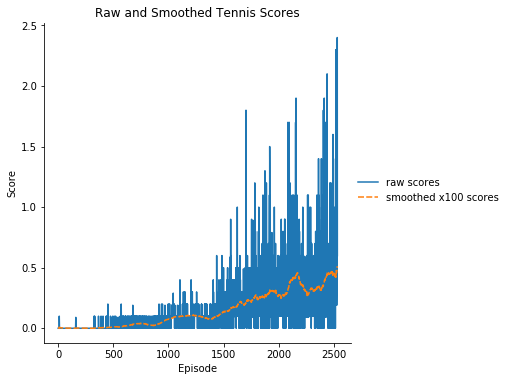

In [12]:
ax=sns.relplot(data=pdf,kind='line')
ax.set(xlabel="Episode",ylabel="Score", title="Raw and Smoothed Tennis Scores")
ax.savefig("output/scores.png")

### 6. Witness Trained Agents Performance
The below cell block loads in a previously trained model and opens the visual version of the unity tennis environment so that the user may witness a match between two trained agents. This cell only runs if modified to set the skip_trained_agent_monitor flag is set to False.

In [13]:
skip_trained_agent_monitor = True
if not skip_trained_agent_monitor:
    try: env
    except: env = None
    from maddpg_agent import MADDPGAgent
    from unityagents import UnityEnvironment
    import numpy as np
    import torch
    if env:
        env.close()
    env = UnityEnvironment(file_name='./Tennis_Linux/Tennis.x86_64')

    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]

    # number of agents 
    num_agents = len(env_info.agents)
    print('Number of agents:', num_agents)

    # size of each action
    action_size = brain.vector_action_space_size
    print('Size of each action:', action_size)

    # examine the state space 
    states = env_info.vector_observations
    state_size = states.shape[1]
    print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
    print('The state for the first agent looks like:', states[0])
    agent = MADDPGAgent(num_agents, state_size, action_size, random_seed=47, batch_size=256, buffer_size=int(1e6), use_batch_norm=True)
    agent.agents[0].actor_local.load_state_dict(torch.load("./data/actor_local0.pt"))
    agent.agents[1].actor_local.load_state_dict(torch.load("./data/actor_local1.pt"))


    for i in range(10):
        env_info = env.reset(train_mode=False)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent.reset_noise()
        game_time = 0
        while True:
            # states[0] is the observation of agent 0 and states[1] is the observation of agent 1
            # actions[0] is the action chosen by agent 0 and actions[1] is the action chosen by agent 1
            # selection of action is always based only on the observation
            actions = agent.act(states)

            # Apply these actions to the environment and receive the next state, rewards, and doneness
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards        
            dones = env_info.local_done

            # Send in these two states, actions, next_states, and dones into the agent
            scores += np.array(env_info.rewards)
            states = next_states
            if np.any(dones):
                break
        print("Game {} Score {}".format(i+1, np.max(scores)))